In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

## A/B test - Udacity

In this project, we design and analyze an A/B test run by Udacity. The aim of the experiment is to reduce the number of students who desert after the free trial because of unaligned expectations of how much effort the courses demand. 

### The setup

The experiment has two conditions. After students selected in the main homepage that they wanted to start the free trial, some students were asked how many hours a week they planned committing for the course. For those who said less than 5 hours, they were shown a message saying that generally more than 5 hours for successful completion is needed. They were, then, given the choice to proceed signing up, or to take the free courses.


### Expectations

The expectations of the experiment was that when students were given correct information about completion time per week, less students would desert the course after the two weeks of free trial. Therefore, if the experiment is correct, we should observe a difference in the number of dessertions for both groups. We will be more precise with the metrics used in the experiment in the Metrics section.


### Unit of diversion

The unit of diversion will be a cookie. If the student decides to enroll, then they will be tracked by user-id for the rest of the experiment. 

### Metric Choice

#### Invariant Metrics
- Number of cookies
- Click-through probability
- Number of clicks


#### Evaluation
- Gross-conversion
- Retention
- Net conversion

We will start with the invariant metrics. If randomization is correctly done, we should not be observing differences between control and experiment conditions. 

*Number of cookies* on course overview webpage should not be affected by the randomization. Note that the randomization occurs after a user has landed in the web page and clicks "start free trial". Therefore, as this is a pre-experiment metric, there should be no difference between experiment and control groups.

*Number of clicks* and *click-through probabilities* should also remain the same. As we mentioned before, the start free trial click is the beginning step for the randomization. Therefore, there is no reason to believe that one group would have on average more clicks than the other. This is also true for the click-probability, given that a condition for randomization is that the user has clicked on that button.

*Number of user ids* should definitely be affected by the experiment. If the experiment works, then we should observe that less people in the experimental group will continue to create a Udacity account. The warning message would serve to disuade those students who are not sure about its time commitment.

*Gross-conversion* should also be affected. As we mentioned, the warning for those students who have less than 5 hours should serve as a dissuassive mechanism. Therefore, all things equal, we should oberve less students enrolling for the free-trial. Thus, the gross conversion rate will be lower for this group.

*Retention* should be bigger for the experiment students. If the experiment works, less students who show less commitment should go on to register for the trial period. Therefore, in general there will be less drop-outs from this group.

Net conversion can be tricky. As the experiment was planned, the only thing that should be affected is the number of users that drop out during the trial period. All things equal, this should not affect how many people will continue registering after the 14 day span. However, we want to make sure that we can observe this from the data. Therefore, we want to check if the experiment introduces a significant decrease in net conversion. 

We sum up the type of metric and the direction expected in the following table:


|Metric |  Invariant  | Expected Change|
|:----------:|:--------------:|:----------------:|
| Number of Cookies | Yes | = |
| Number of User Ids | No | < |
| Click-through-prob | Yes | = |
| Gross conversion | No | < |
| Retention | No | > |
| Net conversion | Yes | < |

The goal of the experiment can be measured at two thresholds. The first is to check if the message actually works. The warning message is there to make people with little time to reflect on its time commitments. Therefore, it should lower the amount of people willing to register after receiving that message. This first effect can be measured with two metrics: number of users ids per condition and gross conversion. In both cases, we would expect lower numbers for the experimental condition.

However, the experiment is ultimately interested in reducing dessertion after signing up. This is meassured by retention. The idea here is that the experiment is more forward looking. It is not only interested in the immediate effect of the message, but also what it means in terms of people signing up after the trial period is passed. 

The first threshold would only tell us if the experiment is actually working. However, as retention and net conversion is of interest for the company we think it would only be worth the while making such change if the retention rate is bigger for the experimental group. We would be also very interested in checking if it si true that the net conversion is not significantly reduced. For example, one of the unintentional consequences of the experiment could also be to reduce the number of people who remained enrolled passed the 14 days span. This would be something very worrying that the company might want to avoid. 

## Measuring variability

We count with these estimates of the previously analyzed metrics. We will use these data to calculate the estimated variability of our evaluation metrics.

Unique cookies to view page per day: 40000

Unique cookies to click "Start free trial" per day:	3200

Enrollments per day:	660

Click-through-probability on "Start free trial":	0.08

Probability of enrolling, given click:	0.20625

Probability of payment, given enroll:	0.53

Probability of payment, given click	0.1093125

We will estimate the standard deviation for our selected evaluation metrics. As we will only be using metrics for which we can calculate their standard deviation analytically, we will use the probability and rates measures. Note, also that they indirectly capture some of the count metrics, e.g. a change in enrollments per day is also capture by retention.

We can use the binomial distribution to find the standard deviations of these metrics.

Note that we are given that we have 5000 cookies. Therefore, we need to adjust our previous metrics to take that into account when calculating our standard deviation.

In [217]:
def finding_n(number_cookies, baseline_cookies, baseline_number):
    x = (number_cookies/float(baseline_cookies))*baseline_number
    return x

In [218]:
nb_clicks = finding_n(5000, 40000, 3200)
nb_enroll = finding_n(5000, 40000, 660)
print "new baseline clicks: {}".format(nb_clicks)
print "new baseline enrollments: {}".format(nb_enroll)

new baseline clicks: 400.0
new baseline enrollments: 82.5


In [219]:
def finding_sdev(p, N):
    product = (p*(1-p))/float(N)
    se = np.sqrt(product)
    return se

In [90]:
print finding_sdev( 0.20625, nb_clicks)
print finding_sdev( 0.53, nb_enroll)
print finding_sdev( 0.1093125, nb_clicks)

0.020230604137
0.0549490121785
0.0156015445825


| Metric |  N  | Std. Dev.  |
|:------:|:----:|:----------:|
| Gross conversion | 400 | <span style="color:blue"> 0.0202 </span> |
| Retention | 660 | <span style="color:blue"> 0.0549 </span> |
| Net Conversion |  3200 | <span style="color:blue"> 0.0156 </span> |

#### Unit of analysis vs. unit of deversion

Note that the unit of analysis for this experiment is the user. Our purpose is to know how students react to the information given. This is separated in two, previous to the registry there are no real data on users, so we use cookies. On the other hand, once the student is registered we can identify him/her with user id. 

Normally, we have a divergence between unit of diversion and unit of analysis when we use a unit of diversion that aggregates behavior.  

Note that for Gross conversion and Net conversion we do not observe a difference between unit of analysis and diversion. Both of them are measured at the cookie level. If using a cookie level diversion, however we do observe a divergence with retention, because this metric is based on user id. Therefore, using empirical estimates of the variance will be more accurate.

## Sizing the experiment

In total we have three metrics we want to evaluate. In this case we will only launch the experiment if we find that our experiment reduces gross conversion, increases retention and does not reduce net conversion. In this case, we will launch the experiment if the three metrics is in the expected direction. While we are using multiple metrics, we will not be using Bonferroni, because we apply this correction only when we would accept the result if **any** of our metrics is in the expected direction. In our case, we will accept it only if **all** of our metric are in the expected direction.



We calculate the size needed given the significance level and the practical significance for our evaluation metrics. Note that we will end up selecting the bigger size, so that we make sure we have enough power to estimate all of our evaluation metrics. We use the following [web page](http://www.evanmiller.org/ab-testing/sample-size.html) to calculate the specific numbers of the power. 


| Metric | Statistical Significance | Practical Significance | Size |
|:------:|:------------------------:|:----------------------:|:----:|
| Gross conversion | 0.05 | 0.01 | <span style="color:blue"> 25,835 </span>  |
| Retention | 0.05 | 0.01 | <span style="color:blue"> 39,115 </span>|
| Net conversion | 0.05 | 0.0075 | <span style="color:blue"> 27,413 </span> |

### Number of pageviews needed

As we saw before, if we want to have these numbers, we would need higher page views, given that not every page view is a conversion or a retention. Using 5000 cookies per day as our traffic, we get that the following days will be needed to complete the experiments. We will use of calculation the size of <span style="color:blue">  4741212 </span>, which is the bigger of both quantities.

In [2]:
# Number of page views
(39115*2*5000)/82.5

4741212.121212121

In [4]:
#Number of days
4741212/40000

118

In the hypothetical case that we decided to assign all the traffict to the experiment, at 40000 cookies per day, we will need to  <span style="color:blue"> 118 </span> days.

However, this seems like a really lengthy period to run an experiment. Admittedly, we need to change again our metric selection. In this case, we will not use retention. Instead we will use gross conversion and net conversion to perform the calculations.

| Metric | Statistical Significance | Practical Significance | Size |
|:------:|:------------------------:|:----------------------:|:----:|
| Gross conversion | 0.01 | 0.05 | <span style="color:blue"> 25,835 </span> |
| Net conversion | 0.01 | 0.05 | <span style="color:blue"> 27,411 </span>|


We will, therefore, be needing 27,411 subjects in each of the conditions. We will calculate the number of pageviews.

In [6]:
(27411*2*5000)/400.0

685275.0

In [5]:
# Number of days 
685275/40000.0

17.131875

For <span style="color:blue">685275 </span> page views, we will need a total of <span style="color:blue"> 18 days </span> to run the experiment. This is a more reasonable number.

### Assingning traffic
We think we can divert all the traffic for the experiment because:
1. The experiment does not involve the collection of private information. The diversion is done using a cookie, therefore no records are kept at any point of the experiment about sensitive information of the user (e.g. medical records, political views, etc.)
2. The experiment does not fundamentally change users experience or is related to a major change that could disrupt Udacity's usage.
3. The study does not cause any possibility of harm for the subject. Subjects are only asked to consider their time constraints to lead to more reasoned decisions. In no case, this can be consider as something harmful for participants.

## Sanity checks

From the analysis performed above, we have selected two invariant metrics: number of cookies and number of clicks. 

Number of cookies is population invariant. This should not differ between our control and experiment groups, given that this was randomly assingned between the two conditions. This is a good sanity check to see if the randomization actually worked. 

We know that there was a 50% chance of being assigned to either of those groups. We can use the binomial distribution to check if the differences between these two conditions are significant. If they are not, we shoulbe be closely looking at the randomization mechanism. Perhaps there was something that was not working as expected.

For checking this metric we will perform the following steps:
1. Compute the standard deviation of the binomial distribution.
2. Multiply by the z-score to get a margin of error.
3. Compute the confidence interval around 0.5.
4. Check whether the observed fraction is within the interval.
Given the amount of subjects that we have, we will be using a normal approximation to the binomial distribution. We will use a significance level of 95%.

In [13]:
control = pd.read_csv("Control.csv")
control.columns = [i + "_control" for i in control.columns]

In [14]:
experiment = pd.read_csv("Experiment.csv")
experiment.columns = [i + "_experiment" for i in experiment.columns]

In [15]:
exp_df = pd.merge(experiment, control, left_on="Date_experiment", right_on="Date_control")

In [16]:
#Step one
sd_pageviews = np.sqrt((0.5*0.5) / 
                       float(exp_df["Pageviews_experiment"].sum() 
                             + exp_df["Pageviews_control"].sum()))
sd_pageviews

0.00060184074029432473

In [17]:
#Step two
m = sd_pageviews * 1.96
m

0.0011796078509768765

In [18]:
#Step 3
ci_left = 0.5 - m
ci_right = 0.5 + m
ci_left, ci_right

(0.49882039214902313, 0.50117960785097693)

In [19]:
#Step 4
exp_df["Pageviews_control"].sum()/float(exp_df["Pageviews_experiment"].sum() + exp_df["Pageviews_control"].sum())

0.50063966688061334

From the results we can see that the experiment proportion is within the confidence interval previously calculated. This means that we can not reject the null that this proportions come from the same distribution. This is good, because it means that the randomization was correctly performed. 

We will perform now the sanity check for the number of clicks. All things equal, we should not observe a higher click through probability  in any of the cases. If we do, then something suspicious might be going on which prevents us from comparing experiment and control.

We will proceed as we did for the previous case, assuming that in both cases the distribution is the same and that the proportion of clicks is 50/50 divided.

In [20]:
# Finding standard errors
#se_click_pool = 
se_clicks = np.sqrt(0.5*(0.5) /
            float(exp_df["Clicks_control"].sum() + exp_df["Clicks_experiment"].sum()))
se_clicks

0.0020997470796992519

In [21]:
ci_click_left = 0.5 -1.96*se_clicks
ci_click_right = 0.5 + 1.96*se_clicks
ci_click_left, ci_click_right

(0.49588449572378945, 0.50411550427621055)

In [28]:
#prob_dif = 
exp_df["Clicks_control"].sum() / float(exp_df["Clicks_control"].sum() + exp_df["Clicks_experiment"].sum())

0.50046734740666277

From the result, we can check that this is within the confidence interval. In other words, the null hypothesis that there is no difference between both populations cannot be rejected. This also proves that randomization was properly done. There is no significant difference for this metric that we already expected to be invariant. 

We summarize the results in the following table:

| Metric | Statistical Significance | Effect | Confidence Intervals | Significant |
|:------:|:------------------------:|:-----------:|:-----:|:----:|:----:|
| Number of cookies | 0.05 | <span style="color:blue"> 0.5006 </span> |<span style="color:blue"> 0.4988 - 0.5012 </span> | No |
| Number of clicks | 0.05 | <span style="color:blue"> 0.5005 </span> |<span style="color:blue"> 0.4959 - 0.5041 </span> | No |

### Effect size tests

We will check the difference between experimental and control groups. We will use the two metrics we used for sizing: *gross conversion* and *net conversion*. 

The procedure that we will follow with these metrics is as before. In all of these cases the metrics are proportions. Therefore, we can calculate the standard deviation analytically using the binomial distribution. Note that for all of these metrics we calculate the confidence intervals using the significant level at a 95% significance level.

In order to calculate these quantities, we restrict our metrics to cover the period for which we have complete results for the experiment.


### Gross conversion

In [33]:
exp_df = exp_df.iloc[:23,:]

In [34]:
#gross conversion
total_clicks = exp_df["Clicks_control"].sum() + exp_df["Clicks_experiment"].sum()
total_enrollments = (exp_df["Enrollments_control"].sum() 
                     + exp_df["Enrollments_experiment"].sum())
p_pool_gross = total_enrollments / float(total_clicks)
p_pool_gross

0.20860706740369866

In [35]:
#Calculating standard deviation for pool gross
se_gross_pool = np.sqrt(p_pool_gross*(1-p_pool_gross)*(
    (1.0/exp_df["Clicks_control"].sum()) 
    + 1.0/exp_df["Clicks_experiment"].sum()))
se_gross_pool

0.0043716753852259364

In [36]:
#Calculating confidence intervals
ci_left_gross = -se_gross_pool*1.96
ci_right_gross = se_gross_pool*1.96
ci_left_gross, ci_right_gross

(-0.0085684837550428355, 0.0085684837550428355)

In [37]:
#Calculating the effects
prob_gross_control = exp_df["Enrollments_control"].sum() / float(exp_df["Clicks_control"].sum() )
prob_gross_experiment =  exp_df["Enrollments_experiment"].sum() / float(exp_df["Clicks_experiment"].sum())
effect_gross = prob_gross_experiment - prob_gross_control
effect_gross

-0.020554874580361565

In [38]:
print "left ci gross effect {}".format(effect_gross + ci_left_gross)
print "roght ci gross effect {}".format(effect_gross + ci_right_gross)

left ci gross effect -0.0291233583354
roght ci gross effect -0.0119863908253


From the results, we can observe that the effect is not within the confidence interval. This means we can reject the null hypothesis that it is 0.

### Net conversion

In [40]:
exp_df.columns

Index([u'Date_experiment', u'Pageviews_experiment', u'Clicks_experiment',
       u'Enrollments_experiment', u'Payments_experiment', u'Date_control',
       u'Pageviews_control', u'Clicks_control', u'Enrollments_control',
       u'Payments_control'],
      dtype='object')

In [41]:
# Finding pooled probabilities
total_payment = exp_df["Payments_control"].sum() + exp_df["Payments_experiment"].sum()
p_pool_net = total_payment / total_clicks
p_pool_net

0.11512748531241861

In [42]:
# Finding standard errors
se_net = np.sqrt(p_pool_net*(1-p_pool_net)*(
    (1.0/exp_df["Clicks_control"].sum()) 
    + 1.0/exp_df["Clicks_experiment"].sum()))
se_net

0.0034341335129324238

In [43]:
#Calculating confidence intervals
ci_left_net = -se_net*1.96
ci_right_net = se_net*1.96
ci_left_net, ci_right_net

(-0.0067309016853475505, 0.0067309016853475505)

In [44]:
#Calculating effect
p_net_control = exp_df["Payments_control"].sum() / float(exp_df["Clicks_control"].sum() )
p_net_exp = exp_df["Payments_experiment"].sum() / float(exp_df["Clicks_experiment"].sum() )
effect_net_diff = p_net_exp - p_net_control  
effect_net_diff

-0.0048737226745441675

In [45]:
print "left ci net effect {}".format(effect_net_diff  + ci_left_net)
print "right ci net effect {}".format(effect_net_diff  + ci_right_net)

left ci net effect -0.0116046243599
right ci net effect 0.0018571790108


In this case, the calculated effect is within the confidence interval. We cannot reject the null of no effect. Note that this goes with what we were expecting.

In what follows we present a table with the results:

| Metric | Statistical Significance | Practical Significance | Effect | Confidence Intervals | Statistical Significant | Practical Significant |
|:------:|:------------------------:|:-----------:|:-----:|:----:|:----:|:---:|:---:|
| Gross Conversion | 0.05 | -0.01 | <span style="color:blue"> -0.0206 </span> |<span style="color:blue"> -0.0291 - -0.0120 </span> | Yes | Yes |
| Net Conversion | 0.05 | 0.0075  | <span style="color:blue"> -0.0049 </span> |<span style="color:blue"> -0.0116 - 0.0019 </span> | No | No |

From the results we can observe that gross conversion is both statistically and practically significant. This means that the experiment does reduce the number of students who proceed to the registration phase.

The case of net conversion is opposite. It shows no statistical or practical significance. The results of the experiment seem to suggest that there is no actual difference in terms of the net conversion. We will analyze this result further after we have plotted the effects.

### Plotting results

In order to check wether the differences are statistical and of practical significance, we plot our results.

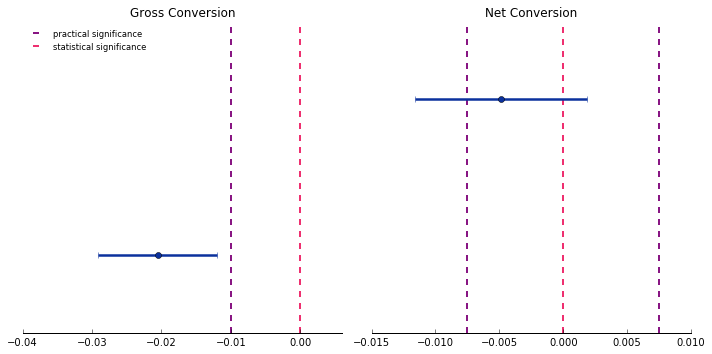

In [48]:
#Plotting the effects
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
#Plotting gross conversion
ax[0].errorbar(effect_gross, 1, xerr=ci_right_gross, fmt="o", color="#0B319D", elinewidth=2.5)
ax[0].set_title("Gross Conversion")
ax[1].errorbar(effect_net_diff, 3, xerr=ci_right_net, fmt="o", color="#0B319D", elinewidth=2.5, zorder=1)
ax[1].set_title("Net Conversion")
ax[0].axvline(-0.01, color="#881683", lw=2, ls="dashed", label="practical significance")
ax[0].axvline(0, color="#EE3070", lw=2, ls="dashed", label="statistical significance")
ax[0].set_xlim([-0.04, 0.006])
ax[1].axvline(0, color="#EE3070", lw=2, ls="dashed", zorder=0, label="statistical significance")
ax[1].axvline(0.0075, color="#881683", lw=2, ls="dashed", zorder=0, label="practical significance")
ax[1].axvline(-0.0075, color="#881683", lw=2, ls="dashed", zorder=0, label="practical significance")
for i in range(2):
    ax[i].set_ylim([0, 4])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].set_yticks([])
    ax[i].xaxis.set_ticks_position('bottom')
ax[0].legend(loc='upper left', fontsize="small", frameon=False)
plt.tight_layout()

### Sign test

In order to confirm that our results are robust, we will also perform a sign test. 

We will check the number of days for which our experiment was run and also the number of days for which there was a positive or negative change (according to the direction of the effect that we are expecting.)

### Gross conversion sign test
In the case of gross conversion, the expected change is negative. Correspondingly, we will classify as a success each time that our metric is smaller than the control. We will then compare it using the binomial distribution to check what are the probabilities that this result was an effect of random chance.

In [215]:
# Sign test for gross conversion
prob_gross_control_st = exp_df["Enrollments_control"]/ exp_df["Clicks_control"]
prob_gross_experiment_st =  exp_df["Enrollments_experiment"] / exp_df["Clicks_experiment"]
number_success = (prob_gross_experiment_st - prob_gross_control_st < 0).sum()
number_cases = prob_gross_experiment_st.notnull().sum()
number_success, number_cases

(19, 23)

From what we observe above, we have that in 19 of the 23 days we observe that our gross conversion is lower for the experiment group. Our null hypothesis is that there is no actual difference between both groups, that is that the rate is 50%. We will have to check how likely is that we observe this outcome from a binomial distribution.

In [216]:
#Sign test result retention
left_cum = binom.cdf(number_cases - number_success , number_cases, 0.5, loc=0)
right_cum = 1 - binom.cdf(number_success-1, number_cases, 0.5, loc=0)
right_cum + left_cum

0.0025994777679443359

From the result, we can observe that the chances that the differences were caused by chance are really slim. Therefore, we can reject the null hypothesis that both groups come from the same distribution.

### Net conversion

We will also perform the same analysis here. We want to observe in this case that there is no difference between both distributions. To proceed with the calculation, we will classify as a success when the experiment case is smaller as the control.

In [213]:
p_net_control_st = exp_df["Payments_control"] / exp_df["Clicks_control"]
p_net_exp_st = exp_df["Payments_experiment"] / exp_df["Clicks_experiment"]
number_success = (p_net_control_st - p_net_exp_st   > 0).sum()
number_cases = p_net_control_st.notnull().sum()
number_success, number_cases

(13, 23)

In [214]:
#Sign test result retention
left_cum = binom.cdf(number_cases - number_success , number_cases, 0.5, loc=0)
right_cum = 1 - binom.cdf(number_success-1, number_cases, 0.5, loc=0)
right_cum + left_cum

0.67763948440551758

As we can see, the pvalue obtained is quite high  <span style="color:blue"> 0.6776</span>. This means that we will fail to reject the null in this case. For this metric there is no difference between the analytical and the sign test results.

### Results  overview

Note that for our results we have not used the Bonferroni correction. As we said before, we will launch the experiment if all of our measures are significant. We would have used the Bonferroni correction if we would have launch the experiment when any of the measures was significant. 

We calculated the number of views needed according to the size of the experiment. We discarded using retention, because it would take too long to have results. 

The gross conversion shows unified results. Our analytical results yielded practical and statistical significance. This means that the message is serving the purpose of reducing the number of people who complete the checkout. This result was confirmed by the sign test.

In case of net conversion, the results go in line with what was expected. There was no statistical or practical difference for this metric. We also do not observe significant differences in the sign test. However, a closer look at our graph shows something to be concerned with. Note that the confidence interval of our point estimate does include the lower end of the practical significant. This means that there is a chance that the message is lowering the number of people that decide to go on with the course. This, of course, are not good news, as Udacity does not want to turn away students that would have originally enrolled.

We consider that before launching the change, Udacity would want to be certain that there is no negative effect for net conversion. A possible alternative would be to repeat the experiment to check again if the changes have an effect to the net conversion. We consider that the results we have gather so far are not an acceptable risk that Udacity might want to take. We need to run further experiments to be sure that the net conversion is not affected.

## Recommendation / Follow up experiment

In the above analyzed experiment, we have seen the effect of a *disuasive* message. Udacity wants to prevent frustrated students to enroll by letting them know that in order to complete the program, a certain number of hours is required. 

We think we can also try to check what kind of effect have positive messages. With these types of messages we want to *persuade* students to commit more hours of their time. 

The setup would be different from before. The way we want to reach our students is via email. This email would tell, in a positive way, stories of success, of people narrating that they needed to do the extra effort to complete the program, but it was worth it. Then, a link would get them to the last class they were in. Ideally, we would want to send this message sometime during the first week of enrollment.

**Hypothesis**: Students who receive an email after enrolling will commit more hours to learning and, finally, will sign up as a student in Udacity.

The possible metrics to check:
- Number of user ids
- Retention: ids that remain enrolled after 14 days / user ids who complete checkout.
- Number of entries to web page after email was sent.
- Number of quizzes completed after mail was sent.

Our unit of diversion will be user id. After enrolling, we would randomly determine users that will go to the control and experiment groups. 

### Metrics and expected change

| Metric | Type |Expected Change|
|:------:|:----:|:-------------:|
| User ids| Invariant | None |
| Retention | Evaluation | > |
| Entries after mail | Evaluation | > |
| Quizzes completed | Evaluation | > |

In our case we want to check that retention and either the entries or the quizzes completed are bigger for the experimental condition. This would allow us to check first, if the proposed change is actually effective (using retention as a metric) and the mechanisms by which it is effective (e.g. making students enter Udacity's platform more often or to complete more activities in the web page.)



## References

1. Tang et Al. Overlapping Experiment Infrastructure: More, Better, Faster experimentation.
2. Multiple comparisons problem. [Wikipedia page](https://en.wikipedia.org/wiki/Multiple_comparisons_problem).
3. Evan's A/B tools. [Sample size calculator](http://www.evanmiller.org/ab-testing/sample-size.html).